In [ ]:
from envs.discrete_MDP import DiscreteMDP
from dp import policy_evaluation
from policy import DiscretePolicy
import numpy as np

In [ ]:
# creating 4x4 gridworld
# actions: 0 - up, 1 - right, 2 - down, 3 - left

p0 = np.ones(16)
p0[0] = 0  # terminal state
p0[15] = 0 # terminal state
p0 = p0 / p0.sum()

p = np.zeros([16, 16, 4]) # 0 and 16 terminal states
for s in range(1, 15):
    if s - 4 < 0:
        p[s, s, 0] = 1
    else:
        p[s - 4, s, 0] = 1

    if s % 4 == 3:
        p[s, s, 1] = 1
    else:
        p[s + 1, s, 1] = 1

    if s + 4 > 15:
        p[s, s, 2] = 1
    else:
        p[s + 4, s, 2] = 1

    if s % 4 == 0:
        p[s, s, 3] = 1
    else:
        p[s - 1, s, 3] = 1

r = -np.ones([16, 16, 4]) # -1 for all transitions

env = DiscreteMDP(p0, p, r)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_policy(policy: DiscretePolicy):
    grid_array = policy.p.reshape(4, 4, 4)

    n = grid_array.shape[0]

    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if (i == 0 and j == 3) or (i == 3 and j == 0):
                ax.add_patch(patches.Rectangle((j, n - 1 - i), 1, 1, color='black'))
            else:
                for k in range(4):
                    if grid_array[n-i-1, j, k] != 0:
                        if k == 0:  # Arrow up
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, -0.3, width=0.2)
                        elif k == 1:  # Arrow right
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0.3, 0, width=0.2)
                        elif k == 2:  # Arrow down
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, 0.3, width=0.2)
                        elif k == 3:  # Arrow left
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, -0.3, 0, width=0.2)

                        ax.add_patch(arrow)

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(n + 1))
    ax.set_yticks(np.arange(n + 1))
    ax.grid(True, which='both', color='black', linewidth=1.5, linestyle='-')
    ax.invert_yaxis()  # This inverts the y-axis to make (0, 0) the left-top corner
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()


In [ ]:
from td import td_prediction, sarsa, expected_sarsa, Q_learning

# create equiprobable policy
eq_policy = DiscretePolicy.from_env(env)
eq_policy.p = np.ones([env.states_num, env.actions_num]) / env.actions_num

In [ ]:
td_prediction(env, eq_policy, 10000, 0.4, 1)

In [ ]:
sarsa_policy, sarsa_Q = sarsa(env, 1000, 0.5)
sarsa_policy.p

In [ ]:
sarsa_Q

In [ ]:
from mc import make_greedy_policy
plot_policy(make_greedy_policy(sarsa_Q))

In [ ]:
Q_learning_policy, Q_learning_Q = Q_learning(env, 1000, 0.5)
Q_learning_Q

In [ ]:
plot_policy(make_greedy_policy(Q_learning_Q))

In [ ]:
expected_sarsa_policy, expected_sarsa_Q = expected_sarsa(env, 1000, 0.5)
expected_sarsa_Q

In [ ]:
plot_policy(make_greedy_policy(expected_sarsa_Q))


In [30]:
from td import double_Q_learning
double_Q_learning_policy, double_Q_learning_Q = double_Q_learning(env, 1000, 0.5)
double_Q_learning_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.87499994, -3.29821757, -3.79034424, -1.        ],
       [-2.77734375, -5.73562732, -5.79591095, -2.        ],
       [-6.22231799, -4.85756715, -3.0000097 , -3.86266695],
       [-1.        , -3.11611938, -2.17773438, -1.98239136],
       [-2.        , -4.36567378, -3.81890166, -1.99996033],
       [-3.72518803, -3.86743355, -3.00012196, -3.8685939 ],
       [-4.39903005, -4.02183723, -2.        , -3.77197266],
       [-2.        , -4.3514334 , -1.953125  , -3.9045105 ],
       [-3.88058068, -3.90283966, -3.00334688, -4.18869019],
       [-3.98080444, -2.40209961, -2.        , -3.80374908],
       [-3.64738464, -2.32714844, -1.        , -4.40899459],
       [-5.46642455, -4.73075214, -4.55496769, -5.15438858],
       [-4.1253577 , -2.        , -3.34509277, -4.26971436],
       [-3.02081202, -1.        , -1.97802639, -3.01526267],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

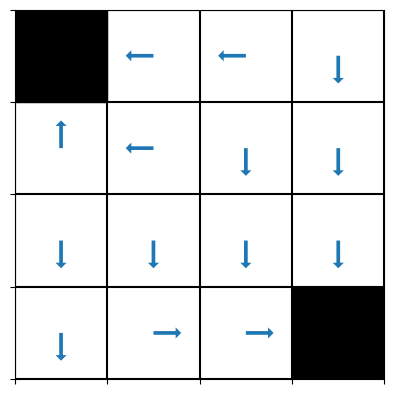

In [31]:
plot_policy(make_greedy_policy(double_Q_learning_Q))